In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [78]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [79]:
## Reading the data
train = pd.read_csv("/content/The-Machine-Hack/src/Data/train.csv")
test = pd.read_csv('/content/The-Machine-Hack/src/Data/test.csv')

In [80]:
train.head()

ID  Levy Manufacturer  ...   Color  Airbags  Price
0  45654403  1399        LEXUS  ...  Silver       12  13328
1  44731507  1018    CHEVROLET  ...   Black        8  16621
2  45774419     -        HONDA  ...   Black        2   8467
3  45769185   862         FORD  ...   White        0   3607
4  45809263   446        HONDA  ...  Silver        4  11726

[5 rows x 18 columns]

In [81]:
test.head()

ID Levy Manufacturer  ...     Color  Airbags Price
0  44020629    -   VOLKSWAGEN  ...      Grey       10   NaN
1  45784798    -      HYUNDAI  ...      Grey       10   NaN
2  45800257    -       NISSAN  ...  Sky blue        8   NaN
3  45797981  975        VOLVO  ...      Blue       12   NaN
4  45814303    -         OPEL  ...     Black        0   NaN

[5 rows x 18 columns]

In [82]:
train = train.drop(['ID'], axis=1).reset_index(drop=True)
test = test.drop(['ID'], axis=1).reset_index(drop=True)

In [83]:
train.columns

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [84]:
import edaUtils as utils

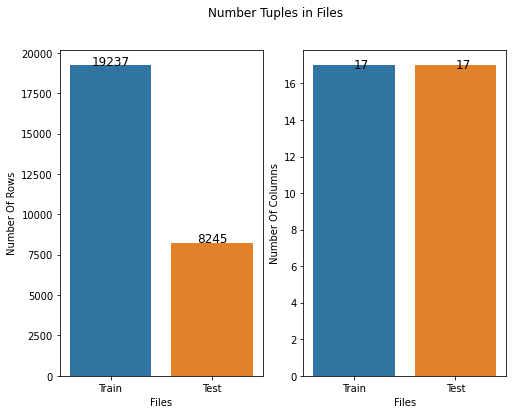

In [85]:
utils.plot_num_records({'Train': train, "Test":test})

In [86]:
for col in train.columns:
    print(col, train[col].nunique())

Levy 559
Manufacturer 65
Model 1590
Prod. year 54
Category 11
Leather interior 2
Fuel type 7
Engine volume 107
Mileage 7687
Cylinders 13
Gear box type 4
Drive wheels 3
Doors 3
Wheel 2
Color 16
Airbags 17
Price 2315


In [87]:
for col in train.columns:
    print("#######################################################################")
    print("Col is ", col)
    print(train[col].unique())

#######################################################################
Col is  Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '

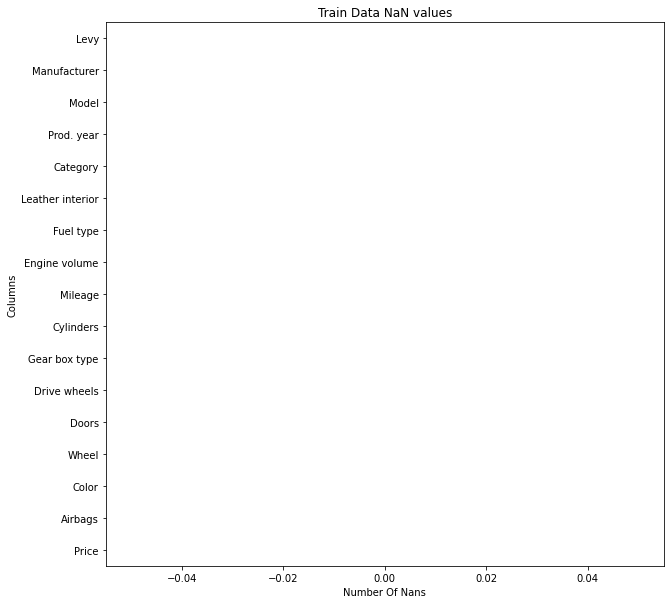

In [88]:
utils.plot_nan(train, "Train Data NaN values")
### Nan replaced by some other Values

In [89]:
(train['Doors']=='04-May').sum()

18332

In [90]:
(test['Doors']=='04-May').sum()

7841

In [91]:
def func (x):
    if x == '04-May':
        return '04'
    if x == '02-Mar':
        return '02'
    return x

In [92]:
train['Doors'] = train['Doors'].apply(func)
test['Doors'] = test['Doors'].apply(func)

In [93]:
(train['Doors']=='04').sum()

18332

In [94]:
(test['Doors']=='04').sum()

7841

In [95]:
train.columns

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [96]:
train['Prod. year'] = train['Prod. year'].apply(lambda x : 2021 - x)
test['Prod. year'] = test['Prod. year'].apply(lambda x : 2021 - x)

In [97]:
train['Levy'] = train['Levy'].apply(lambda x : '0' if x == '-' else x)
train['Levy'] = train['Levy'].astype('int32', copy=False, errors='ignore')
test['Levy'] = test['Levy'].apply(lambda x : '0' if x == '-' else x)
test['Levy'] = test['Levy'].astype('int32', copy=False, errors='ignore')

In [98]:
def func2(x):
    if 'Turbo' in x:
        return float(x[:3])
    return float(x)
train['Engine volume'] = train['Engine volume'].apply(func2)
test['Engine volume'] = test['Engine volume'].apply(func2)

In [99]:
def func3 (x):
    if 'km' in x:
        return (float(x[:-2]))#/10000
    return (float(x))#/1000
train['Mileage'] = train['Mileage'].apply(func3)
test['Mileage'] = test['Mileage'].apply(func3)

In [100]:
# It looks like mileage is nothing but the total distance traversed by the vehicle
train = train.rename({'Mileage': 'Distance'}, axis=1)
test = test.rename({'Mileage': 'Distance'}, axis=1)

In [101]:
train.head()

Levy Manufacturer    Model  ...   Color Airbags  Price
0  1399        LEXUS   RX 450  ...  Silver      12  13328
1  1018    CHEVROLET  Equinox  ...   Black       8  16621
2     0        HONDA      FIT  ...   Black       2   8467
3   862         FORD   Escape  ...   White       0   3607
4   446        HONDA      FIT  ...  Silver       4  11726

[5 rows x 17 columns]

In [102]:
train.nunique()

Levy                 559
Manufacturer          65
Model               1590
Prod. year            54
Category              11
Leather interior       2
Fuel type              7
Engine volume         65
Distance            7687
Cylinders             13
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               17
Price               2315
dtype: int64

In [103]:
test.nunique()

Levy                 434
Manufacturer          62
Model                995
Prod. year            45
Category              11
Leather interior       2
Fuel type              7
Engine volume         61
Distance            3978
Cylinders             14
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               17
Price                  0
dtype: int64

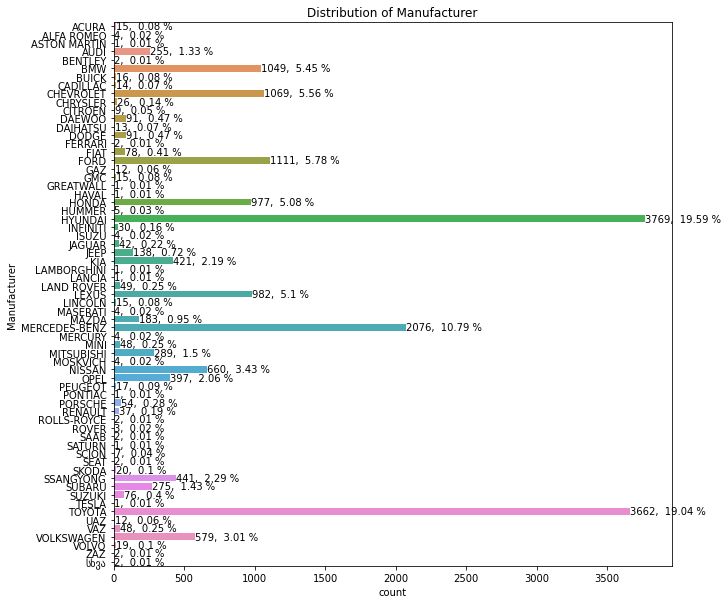

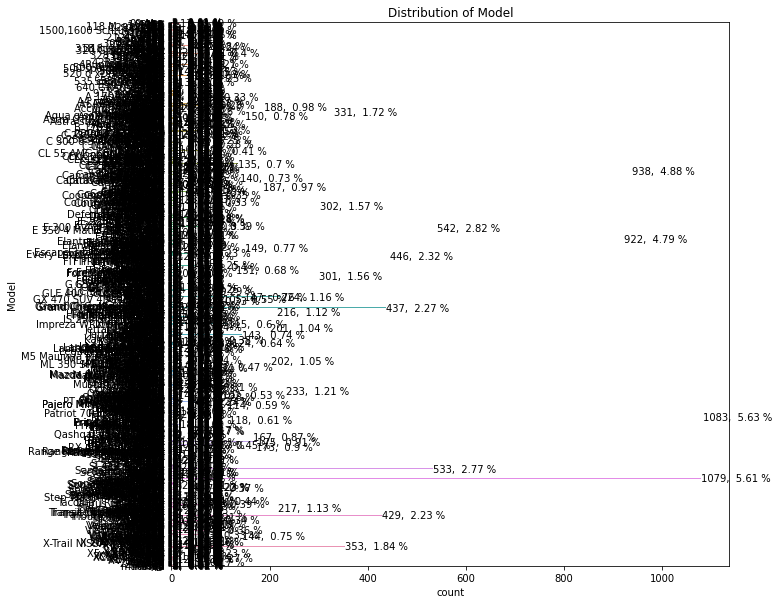

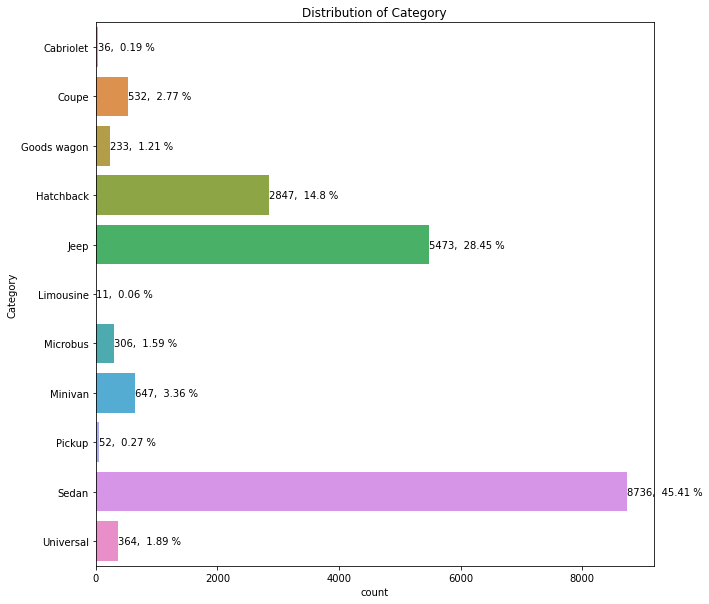

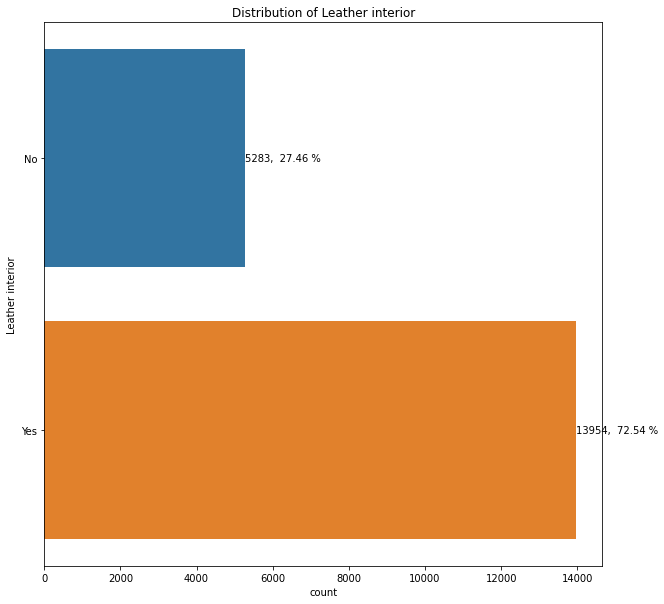

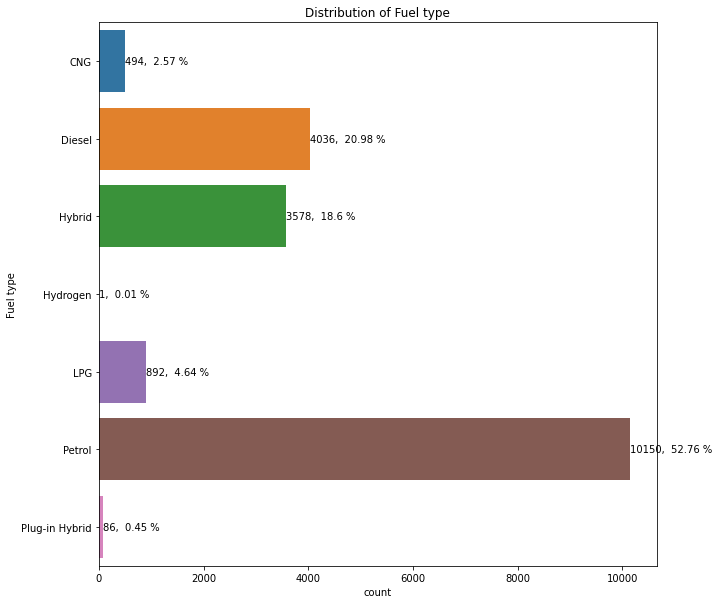

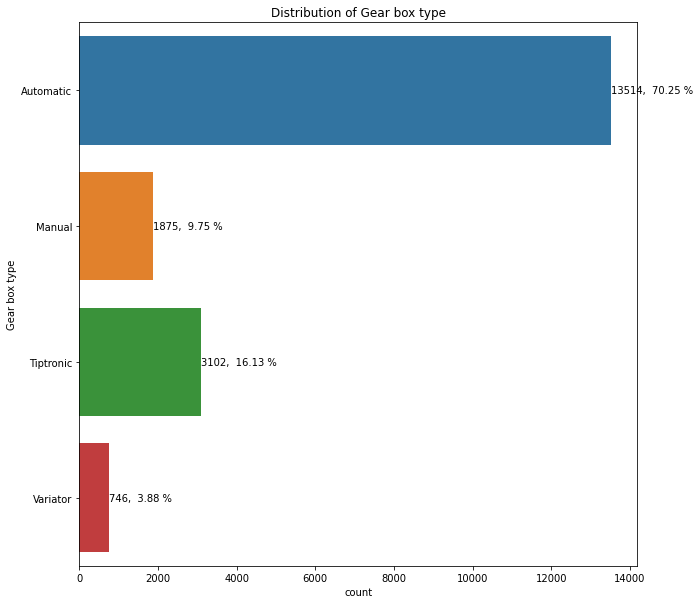

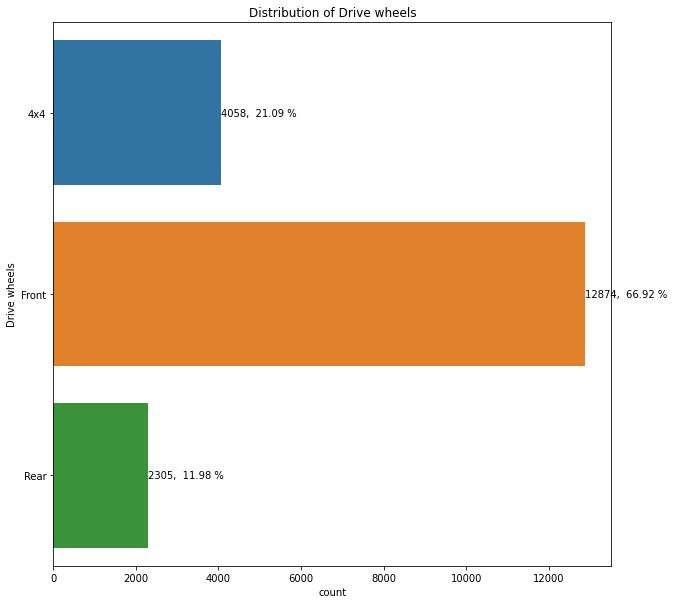

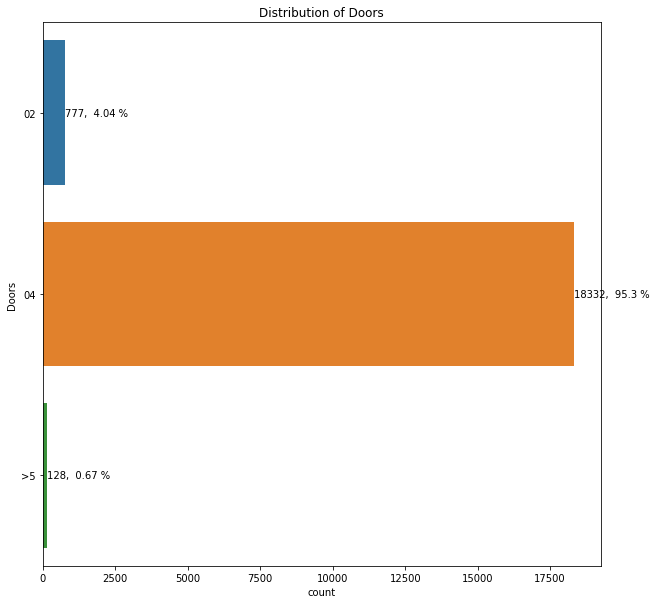

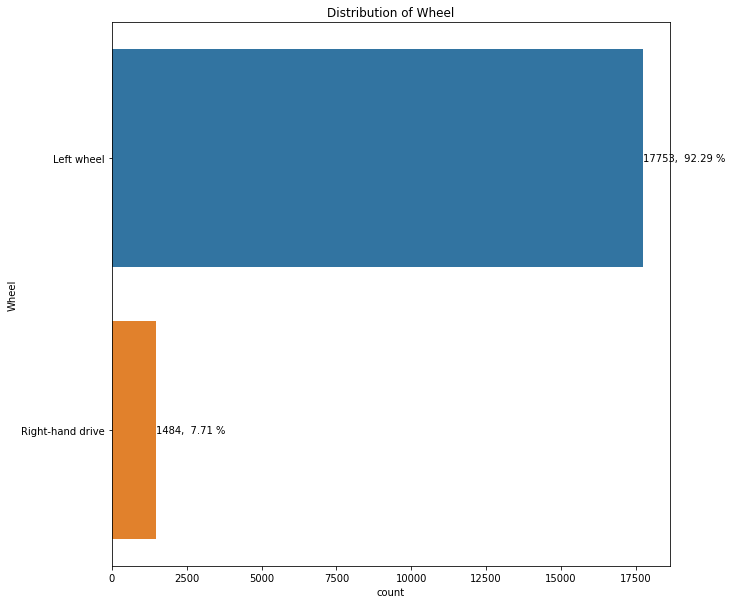

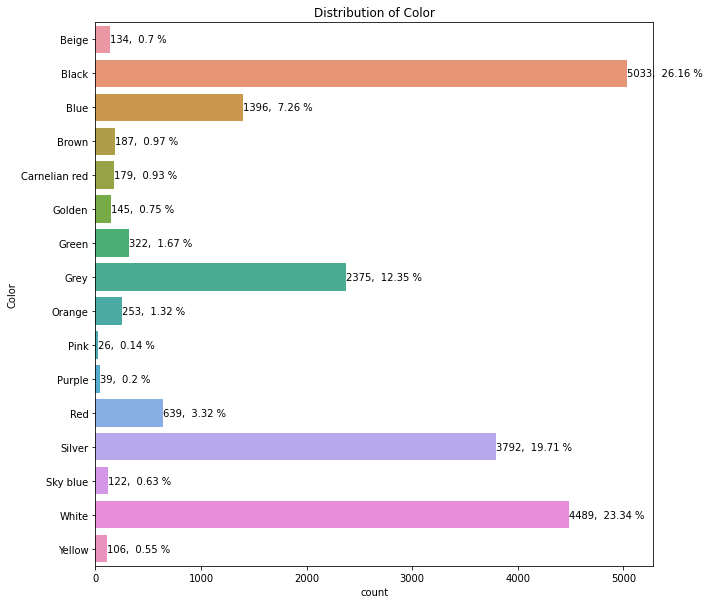

In [104]:
## Selecting categorical
cat_cols = train.dtypes=='object'
cat_cols = list(cat_cols[cat_cols].index)
## Plotting the barplot
for col in cat_cols:
    utils.barplot(train[col], col)

In [105]:
##### Numerical Columns
num_cols = train.dtypes != 'object'
num_cols = list(num_cols[num_cols].index)

Distribution of Levy of train dataset


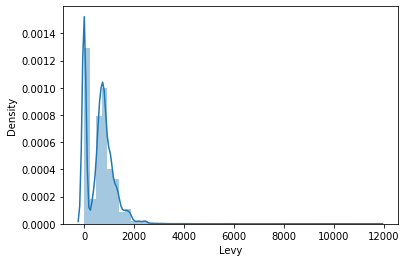

Distribution of Prod. year of train dataset


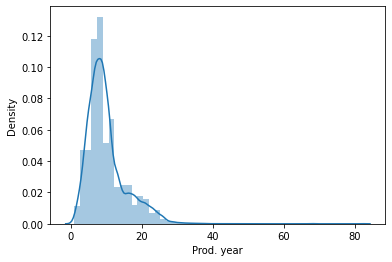

Distribution of Engine volume of train dataset


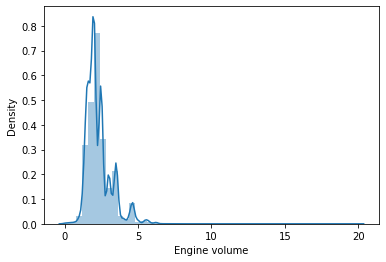

Distribution of Distance of train dataset


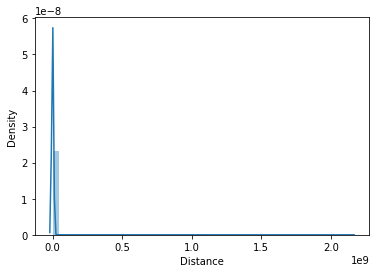

Distribution of Cylinders of train dataset


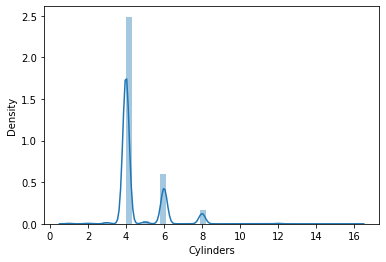

Distribution of Airbags of train dataset


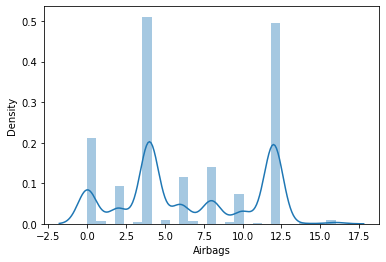

Distribution of Price of train dataset


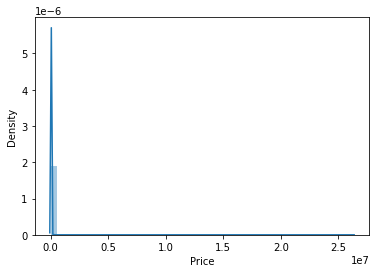

In [106]:
for col in num_cols:
    print("Distribution of " + col +" of train dataset")
    sns.distplot(train[col], kde=True)
    plt.show()

In [107]:
## Let's get some dataset info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              19237 non-null  int32  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  float64
 8   Distance          19237 non-null  float64
 9   Cylinders         19237 non-null  int64  
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
 16  Price             19237 non-null  int64 

In [108]:
train.describe()

Levy    Prod. year  ...       Airbags         Price
count  19237.000000  19237.000000  ...  19237.000000  1.923700e+04
mean     632.528669     10.087176  ...      6.582627  1.855593e+04
std      567.721688      5.668673  ...      4.320168  1.905813e+05
min        0.000000      1.000000  ...      0.000000  1.000000e+00
25%        0.000000      6.000000  ...      4.000000  5.331000e+03
50%      642.000000      9.000000  ...      6.000000  1.317200e+04
75%      917.000000     12.000000  ...     12.000000  2.207500e+04
max    11714.000000     82.000000  ...     16.000000  2.630750e+07

[8 rows x 7 columns]

In [110]:
train.to_csv('/content/The-Machine-Hack/src/Data/train_cleaned.csv', index=False)

In [111]:
test.to_csv('/content/The-Machine-Hack/src/Data/test_cleaned.csv', index=False)